In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, GRU
import tensorflow as tf 
import matplotlib.pyplot as plt

In [ ]:
%cd drive/MyDrive/Deep Learning/AML Lab

/content/drive/MyDrive/Deep Learning/AML Lab


In [ ]:
dataset = pd.read_csv('data_cropped.csv', header=None)

In [ ]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,119,120,121
0,0,-1.284981,-1.284981,-1.257929,-1.230877,-1.203824,-1.176772,-1.095615,-1.041511,-0.960354,...,-0.406911,-0.660570,-0.945936,-1.231302,-1.516668,-1.738620,-1.928864,-2.055693,-2.119108,2-0
1,1,-1.122827,-1.122827,-1.097875,-1.072923,-1.047972,-1.023020,-0.998068,-0.973116,-0.948165,...,-0.249351,-0.374027,-0.748054,-0.997406,-1.371433,-1.620785,-1.994812,-2.244163,-2.368839,2-0
2,2,-0.977356,-0.977356,-0.977356,-0.946813,-0.916271,-0.885728,-0.855186,-0.824644,-0.794101,...,-0.672754,-0.362252,0.103501,0.569253,1.035006,1.656009,2.121762,2.432264,2.742766,2-0
3,3,-1.201350,-1.201350,-1.075992,-0.950633,-0.887954,-0.762596,-0.637238,-0.574559,-0.511880,...,-1.534122,-1.643269,-1.679652,-1.679652,-1.570505,-1.243064,-0.624564,-0.006064,0.321377,2-0
4,4,-0.307148,-0.307148,-0.307148,-0.307148,-0.307148,0.307148,0.307148,0.307148,0.307148,...,-0.166667,0.166667,0.666667,1.000000,1.500000,2.000000,2.166667,2.166667,2.333333,2-0


In [ ]:
labels = []
for i in dataset[121]:
  if i not in labels:
    labels.append(i)
labels

['2-0',
 '4-1',
 '0-3',
 '2-3',
 '4-2',
 '1-0',
 '1-4',
 '3-4',
 '0-2',
 '4-3',
 '2-4',
 '2-1',
 '3-2',
 '0-1',
 '0-4',
 '3-0',
 '4-0',
 '3-1',
 '1-3',
 '1-2']

In [ ]:
dataset = dataset.iloc[:,1:121]
data = dataset.values.astype("float32")
# Normalize the data using min max normalization
normalizer = MinMaxScaler(feature_range = (0, 1))
normdata = normalizer.fit_transform(data)

# Define the class labels. There are 20 classes.
labels = np.zeros(2000)
for i in range(20):
  start = i * 100
  end = start + 100
  labels[start:end] = i 

# Convert to one-hot representation
labels_one_hot = tf.keras.utils.to_categorical(np.asarray(labels)) 

# Split the data into training and test sets.
TRAINING_PERC = 0.85
train_size = int(len(normdata) * TRAINING_PERC)
test_size = len(normdata) - train_size

# Shuffle the data to ensure that the training and test sets are randomly selected.
random_indexes = np.arange(len(normdata))
np.random.shuffle(random_indexes)

x_train, x_test = normdata[random_indexes[:train_size], :], normdata[random_indexes[train_size:], :]
y_train, y_test = labels_one_hot[random_indexes[:train_size],:], labels_one_hot[random_indexes[train_size:],:]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_dense (Dense)         (None, 128)               15488     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 second_dense (Dense)        (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 third_dense (Dense)         (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 fourth_dense (Dense)        (None, 32)               

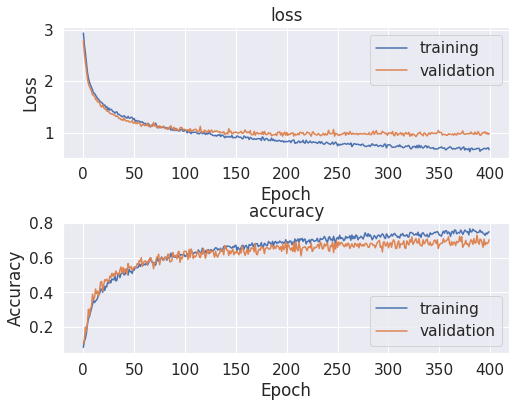

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(120,), name='first_dense'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', name='second_dense'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', name='third_dense'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', name='fourth_dense'))
model.add(Dense(20, activation='softmax', name='final_dense'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Train the MLP model.
history = model.fit(x_train, y_train, epochs=400, batch_size=64, validation_data=(x_test, y_test))
fig, axes = plt.subplots(2,1, figsize=(8,6))
axes[0].plot(history.epoch,history.history['loss'], label='training')
axes[0].plot(history.epoch,history.history['val_loss'], label='validation')
axes[0].set_title('loss')
axes[0].legend(loc='best')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
fig.subplots_adjust(hspace=0.5)
axes[1].plot(history.epoch,history.history['accuracy'], label='training')
axes[1].plot(history.epoch,history.history['val_accuracy'], label='validation')
axes[1].set_title('accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend(loc='best');

10/10 [==============================] - 0s 2ms/step


<Figure size 2880x2880 with 0 Axes>

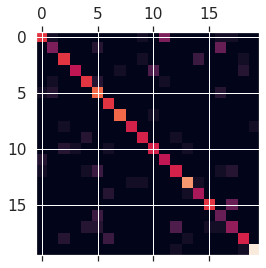

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt 

y_pred = model.predict(x_test)
y_pred_rd = np.argmax(y_pred, axis=1)

y_test_rd = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_rd, y_pred_rd)

plt.figure(figsize=(40,40))
plt.matshow(cm)


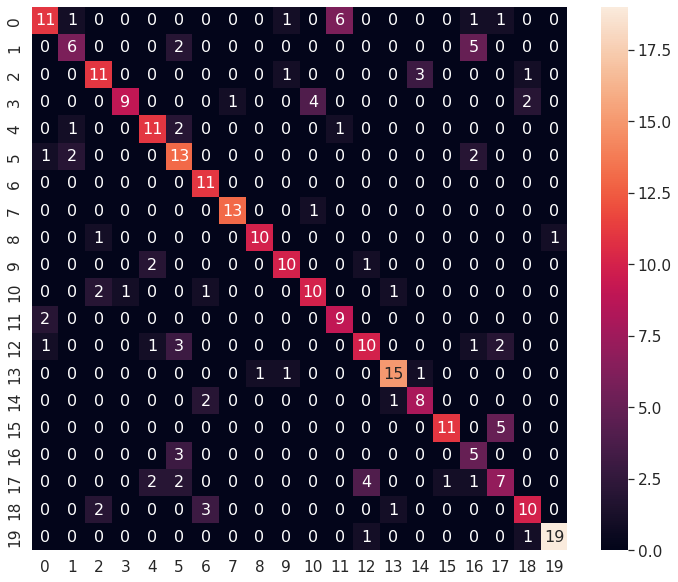

In [ ]:
import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(20), range(20))
plt.figure(figsize=(12,10))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size
plt.show()

In [ ]:
np.sum(np.diag(cm)) / np.sum(cm)

0.6966666666666667

In [ ]:
print(labels[1])
print(labels[16])

4-1
4-0


In [ ]:
import time 

start = time.time()
y_prediction = model.predict(x_test) 
end = time.time()

print((end - start)/300)

10/10 [==============================] - 0s 7ms/step
0.0008390649159749349


In [ ]:
x_test.shape

(300, 120)